#Titanic Survivor Prediction
I wanted to redo this Kaggle comp to reinforce learning from Geron

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
titanic_test = pd.read_csv('data/titanic_test.csv')
titanic_train = pd.read_csv('data/titanic_train.csv')
titanic_train['training'] = 1
titanic_test['test'] = 1
titanic_test['survived'] = np.nan
titanic_all = pd.concat([titanic_test, titanic_train])
%matplotlib inline
titanic_all.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'test', 'survived', 'Survived',
       'training'],
      dtype='object')

In [2]:
titanic_train.info()
# We are missing values for

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  training     891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [3]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,training
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [4]:
titanic_all.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'test', 'survived', 'Survived',
       'training'],
      dtype='object')

In [5]:
titanic_test.head()
titanic_nums = ['Survived', 'Pclass', 'Age', 'Parch', 'Fare', 'SibSp']
titanic_cat = ['Sex']
#We should plan to one hot embarked then see what we can do with Pclass

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'SibSp'}>]], dtype=object)

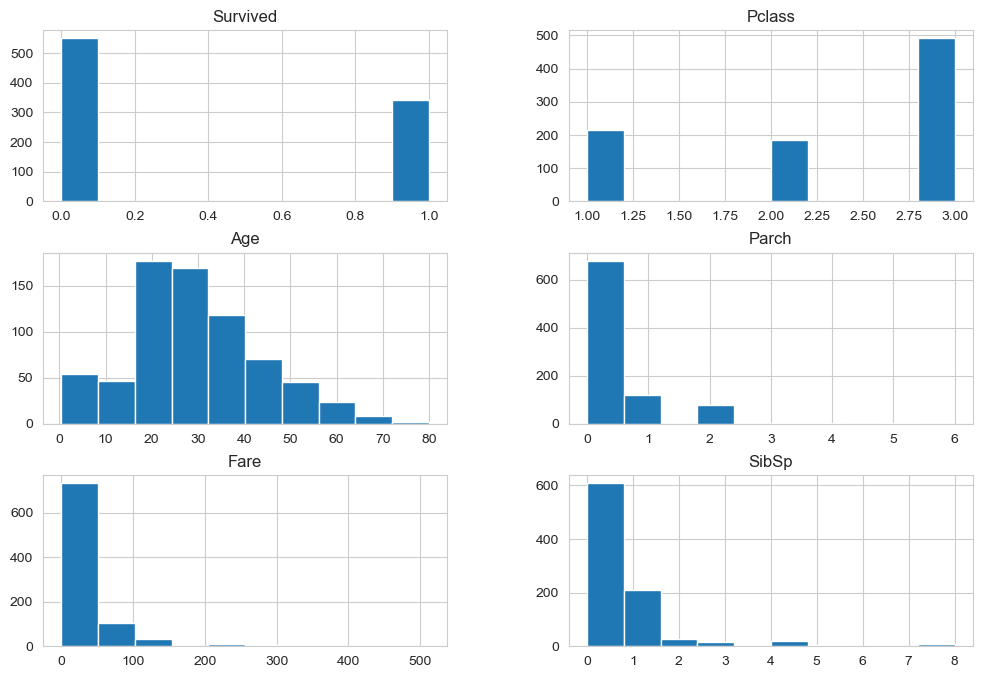

In [6]:
titanic_train[titanic_nums].hist(figsize=(12,8))

In [7]:
#Check our correlation
titanic_train.corr(numeric_only=True)
#basic correlation shows a positive relationship with survived and fare. And a negative relationship with survived and Plass

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,training
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,NaN
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,NaN
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN
training,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


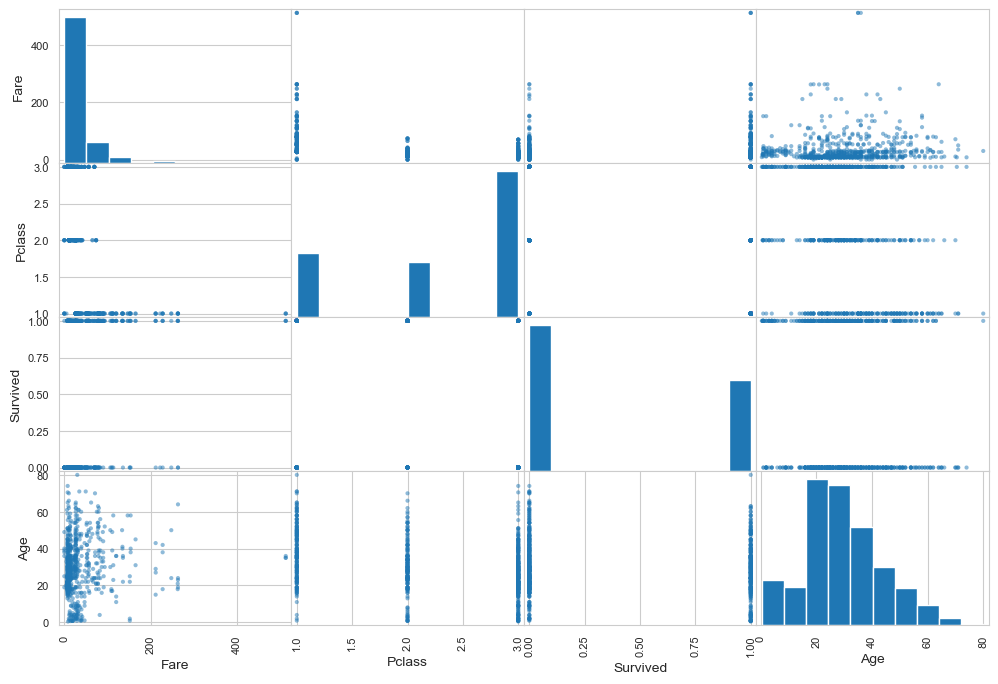

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(titanic_train[['Fare', 'Pclass', 'Survived', 'Age', 'Cabin', 'Ticket']], figsize=(12,8))
plt.show()

In [9]:
#going to drop cabin number and ticket number
titanic_train = titanic_train.drop(['Cabin', 'Ticket'], axis=1)
titanic_test = titanic_test.drop(['Cabin', 'Ticket'], axis=1)
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'test', 'survived'],
      dtype='object')

## Deal with missing values and encode categorical

In [10]:
# todo come back and build pipeline with imputer
titanic_test.info()
titanic_test[['Age']].fillna(titanic_test['Age'].mean(), inplace=True)
titanic_test.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
 9   test         418 non-null    int64  
 10  survived     0 non-null      float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.1+ KB


/var/folders/8y/ys14x8n12rg_41kgl1fqn_xm0000gp/T/ipykernel_85193/741713944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test[['Age']].fillna(titanic_test['Age'].mean(), inplace=True)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'test', 'survived'],
      dtype='object')